# Unsupervised learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Wine.csv')

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 13)

In [5]:
#to check null value
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

<Figure size 720x1080 with 0 Axes>

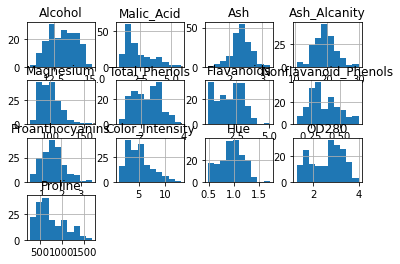

In [7]:
plt.figure(figsize=(10,15))
df.hist(df.columns)
plt.show()

In [8]:
df[df.columns]=np.log(df[df.columns])

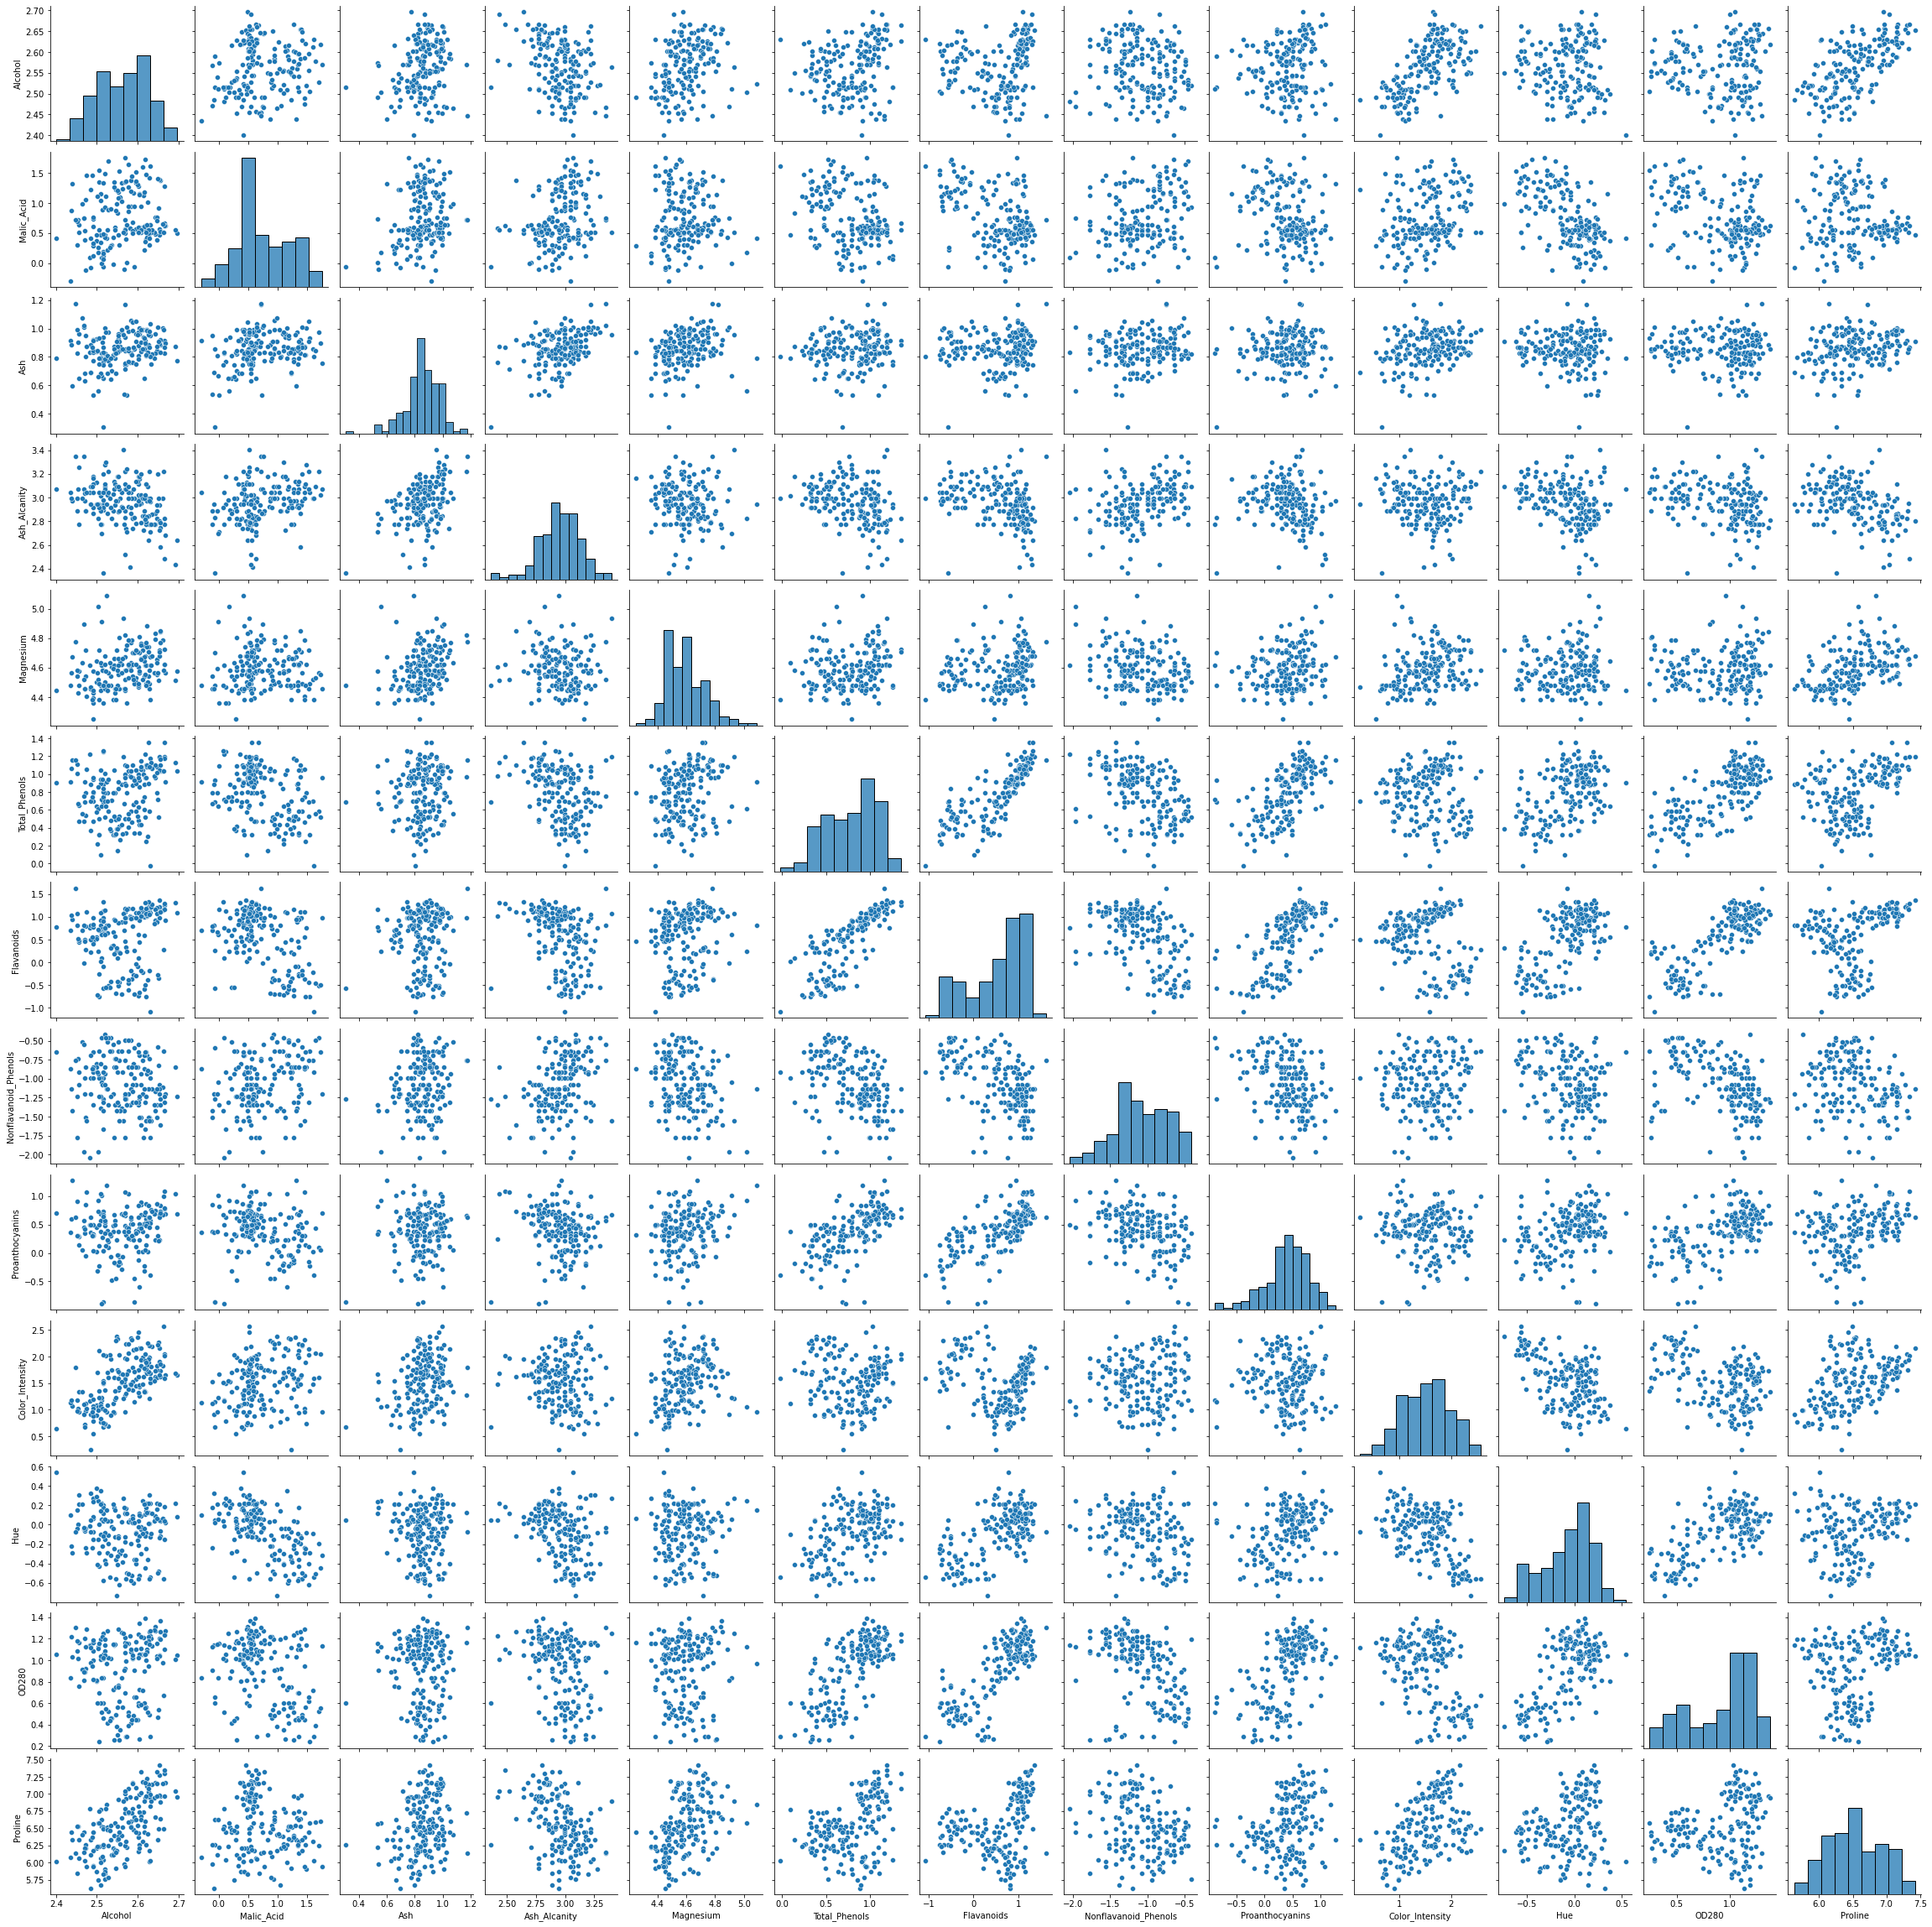

In [9]:
sns.pairplot(df)

In [10]:
#check outliers in our data
def IQR_values(df,column_name):
    q1=df[column_name].quantile(0.25)
    q2=df[column_name].quantile(0.50)
    q3=df[column_name].quantile(0.75)
    IQR=q3-q1
    lower_limit=q1-1.5*IQR
    upper_limit=q3+1.5*IQR
    return lower_limit, upper_limit
outlier={}
for i in df.columns:
    lower_limit,upper_limit=IQR_values(df,i)
    outlier[i]=[lower_limit,upper_limit]
    

In [11]:
#lower limit and upper limit of each variables
outlier

{'Alcohol': [2.363040943813493, 2.767378788639533],
 'Malic_Acid': [-0.5096351910394805, 2.10688869622152],
 'Ash': [0.5739381133323731, 1.1580831858584755],
 'Ash_Alcanity': [2.5101940568480927, 3.4027682621049316],
 'Magnesium': [4.184098784502659, 4.966066864437455],
 'Total_Phenols': [-0.15613467101252754, 1.7410718700973695],
 'Flavanoids': [-1.1179374845238537, 2.360439493624442],
 'Nonflavanoid_Phenols': [-2.033241402520398, -0.10281984908936892],
 'Proanthocyanins': [-0.4438851805779587, 1.3348581044678238],
 'Color_Intensity': [0.18659344177806803, 2.807322802214833],
 'Hue': [-0.7831845350958604, 0.6512366175487214],
 'OD280': [-0.07715708058827864, 1.8922647889756699],
 'Proline': [5.200052797590807, 7.908194947320858]}

In [12]:
for i,j in zip(df.columns,outlier):
    if outlier[j][0]<df[i].min() and outlier[j][1]>df[i].max():
        print("No outliers present in ",format(i))
    else:
        print('There are outliers in ',format(i))
        x=df[df[i]<lower_limit][i].size
        y=df[df[i]>upper_limit][i].size
        print('The count of outliers is: ',format(x+y))

No outliers present in  Alcohol
No outliers present in  Malic_Acid
There are outliers in  Ash
The count of outliers is:  178
There are outliers in  Ash_Alcanity
The count of outliers is:  178
There are outliers in  Magnesium
The count of outliers is:  178
No outliers present in  Total_Phenols
No outliers present in  Flavanoids
There are outliers in  Nonflavanoid_Phenols
The count of outliers is:  178
There are outliers in  Proanthocyanins
The count of outliers is:  178
No outliers present in  Color_Intensity
No outliers present in  Hue
No outliers present in  OD280
No outliers present in  Proline


We can see that there are some outliers in Ash, Ash_Alcanity, Magnesium, Nonflavanoid_phenols, Proanthocyanins

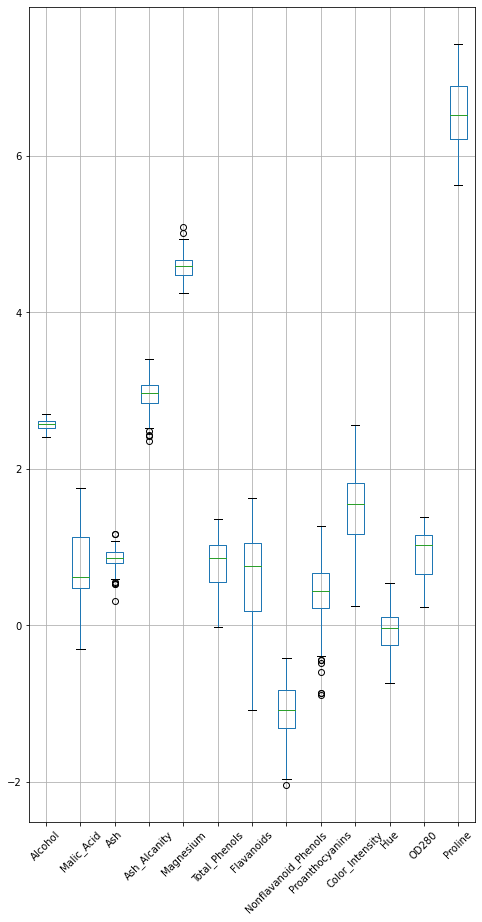

In [13]:
#let us plot boxplot
plt.figure(figsize=(8,15))
df.boxplot()
plt.xticks(rotation=45)
plt.xticks
plt.show()

In [14]:
#let us see the outlier values. 
Ash_outlier=(df['Ash']<outlier['Ash'][0])|(df['Ash']>outlier['Ash'][1])
df.loc[Ash_outlier].index

Int64Index([25, 59, 66, 69, 76, 100, 121], dtype='int64')

In [15]:
#let us drop these values
df.drop([25, 59, 66, 69, 76, 100, 121],inplace=True)

In [16]:
Ash_Alcanity=(df['Ash_Alcanity']<outlier['Ash_Alcanity'][0])|(df['Ash_Alcanity']>outlier['Ash_Alcanity'][1])
df.loc[Ash_Alcanity].index

Int64Index([1, 13, 14], dtype='int64')

In [17]:
df.drop([1, 13, 14],inplace=True)

In [18]:
Magnesium=(df['Magnesium']<outlier['Magnesium'][0])|(df['Magnesium']>outlier['Magnesium'][1])
df.loc[Magnesium].index

Int64Index([95], dtype='int64')

In [19]:
df.drop([95],inplace=True)

In [20]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [21]:
Nonflavanoid_Phenols=(df['Nonflavanoid_Phenols']<outlier['Nonflavanoid_Phenols'][0])|(df['Nonflavanoid_Phenols']>outlier['Nonflavanoid_Phenols'][1])
df.loc[Nonflavanoid_Phenols].index

Int64Index([74], dtype='int64')

In [22]:
df.drop([74],inplace=True)

In [23]:
Proanthocyanins=(df['Proanthocyanins']<outlier['Proanthocyanins'][0])|(df['Proanthocyanins']>outlier['Proanthocyanins'][1])
df.loc[Proanthocyanins].index

Int64Index([60, 61, 68, 141, 142, 171], dtype='int64')

In [24]:
df.drop([60, 61, 68, 141, 142, 171],inplace=True)

In [25]:
df.shape

(160, 13)

In [26]:
#let us scale our data
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()


In [27]:
df=min_max_scaler.fit_transform(df)
df=pd.DataFrame(df,columns=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'])
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.860490,0.406806,0.611436,0.259846,0.868382,0.762931,0.897761,0.447019,0.731003,0.639761,0.608589,0.982391,0.746616
1,0.596430,0.563277,0.810670,0.458930,0.534456,0.762931,0.921115,0.491514,0.854199,0.642810,0.600984,0.797292,0.805967
2,0.893561,0.470593,0.671510,0.343726,0.698116,0.994359,0.951485,0.347606,0.701366,0.779635,0.459003,0.871069,0.929540
3,0.616903,0.608444,0.963465,0.596294,0.761233,0.762931,0.845105,0.660716,0.592706,0.524740,0.608589,0.728669,0.540460
4,0.853360,0.420804,0.628775,0.230446,0.685158,0.875697,0.939607,0.572233,0.640385,0.717264,0.616122,0.704539,0.918157
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.734737,0.987274,0.628775,0.569019,0.445177,0.391702,0.238826,0.846246,0.267263,0.774069,0.226439,0.274448,0.544229
156,0.657480,0.808486,0.654519,0.699261,0.548818,0.441841,0.323246,0.723684,0.439037,0.751056,0.296974,0.179267,0.551691
157,0.624548,0.852399,0.458021,0.541070,0.785734,0.351689,0.289177,0.723684,0.412858,0.895361,0.162410,0.179267,0.611370
158,0.598996,0.608444,0.558551,0.541070,0.785734,0.378607,0.283212,0.858530,0.460016,0.855512,0.175640,0.212162,0.614689


# Let us perform K means clustering

In [28]:
x=df.iloc[:,0:14].values
x

array([[0.86048954, 0.40680598, 0.61143632, ..., 0.60858928, 0.98239074,
        0.74661632],
       [0.59642979, 0.5632771 , 0.81067014, ..., 0.60098425, 0.7972916 ,
        0.80596721],
       [0.89356112, 0.47059343, 0.67150961, ..., 0.45900313, 0.87106856,
        0.92954042],
       ...,
       [0.62454798, 0.85239904, 0.45802144, ..., 0.16241048, 0.17926694,
        0.61137001],
       [0.59899568, 0.60844365, 0.55855117, ..., 0.17563961, 0.2121625 ,
        0.61468875],
       [0.83666717, 0.83153124, 0.86541283, ..., 0.18865007, 0.20133467,
        0.38929612]])

In [29]:
from sklearn.cluster import KMeans
k=range(1,11)
inertia=[]
for i in k:
    model_kmeans=KMeans(n_clusters=i,init='k-means++')
    model_kmeans.fit(x)
    inertia.append(model_kmeans.inertia_)

C:\Users\ss\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [30]:
inertia

[95.89691814887753,
 64.13594018199933,
 45.48858483890735,
 42.38452423431876,
 39.6345088393566,
 37.709772860973324,
 35.75970742070913,
 33.9063298676474,
 32.29763028660811,
 31.32124755128632]

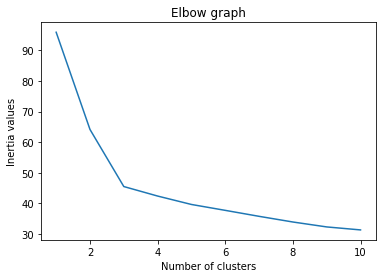

In [31]:
#let us plot our intertia values
plt.plot(range(1,11),inertia)
plt.title('Elbow graph')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia values')
plt.show()

From the graph, we can see that we can use 3 clusters in our dataset. 

We can also use n_cluster value has 5 also. the inertia value gets more steep after that too. 

In [68]:
kmeans_final=KMeans(n_clusters=3,init="k-means++")
kmeans_pred=kmeans_final.fit_predict(df)
kmeans_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

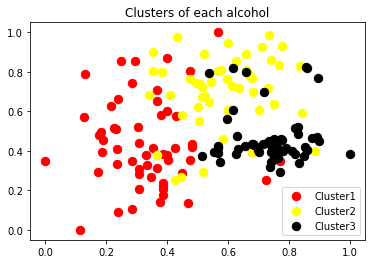

In [69]:
plt.scatter(x[kmeans_pred ==0,0],x[kmeans_pred ==0,1],s=70,c='red',label='Cluster1')
plt.scatter(x[kmeans_pred ==1,0],x[kmeans_pred ==1,1],s=70,c='yellow',label='Cluster2')
plt.scatter(x[kmeans_pred ==2,0],x[kmeans_pred ==2,1],s=70,c='black',label='Cluster3')
#plt.scatter(x[kmeans_pred ==3,0],x[kmeans_pred ==3,1],s=70,c='blue',label='Cluster1')
#plt.scatter(x[kmeans_pred ==4,0],x[kmeans_pred ==4,1],s=70,c='violet',label='Cluster1')
plt.title("Clusters of each alcohol")
plt.legend()
plt.show()



In [70]:
from sklearn.metrics import silhouette_score
score_2 = silhouette_score(x, kmeans_pred, metric='euclidean')
print('Silhouette Score: %.3f' % score_2)

Silhouette Score: 0.341


# Agglomerative Hierarchical Clustering 

In [34]:
#importing dendrogram
import scipy.cluster.hierarchy as sch

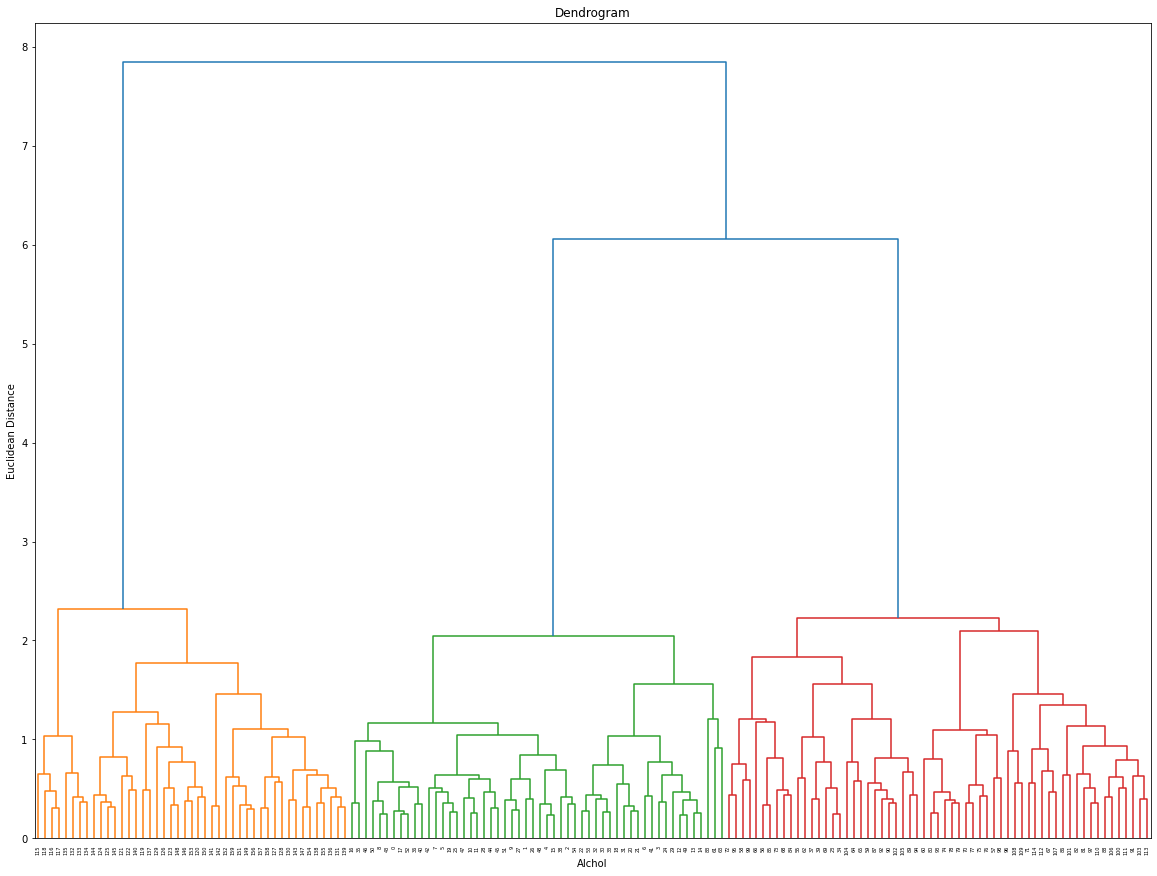

In [35]:
plt.figure(figsize=(20,15))
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Alchol')
plt.ylabel('Euclidean Distance')
plt.show()

When we draw a hypothetical line to find the optimum number of clusters. When we draw a horizontal line, optimum number of clusters we would get is 3.

In [58]:
from sklearn.cluster import AgglomerativeClustering
AC=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [59]:
AC_pred=AC.fit_predict(x)
AC_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

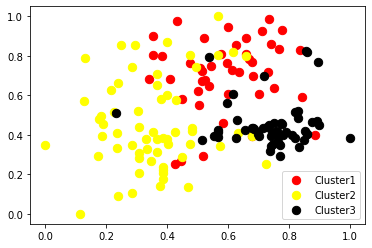

In [60]:
plt.scatter(x[AC_pred ==0,0],x[AC_pred ==0,1],s=70,c='red',label='Cluster1')
plt.scatter(x[AC_pred ==1,0],x[AC_pred ==1,1],s=70,c='yellow',label='Cluster2')
plt.scatter(x[AC_pred ==2,0],x[AC_pred ==2,1],s=70,c='black',label='Cluster3')
#plt.scatter(x[AC_pred ==3,0],x[AC_pred ==3,1],s=70,c='blue',label='Cluster4')
#plt.scatter(x[AC_pred ==4,0],x[AC_pred ==4,1],s=70,c='violet',label='Cluster5')
plt.legend()
plt.show()

In [61]:
from sklearn.metrics import silhouette_score
score_2 = silhouette_score(x, AC_pred, metric='euclidean')
print('Silhouette Score: %.3f' % score_2)

Silhouette Score: 0.321


# Conclusion:-
We can see that both the methods gave us optuimum number of clusters has 3. Though there are some data points which overlap but it is our best clusters for our dataset. 
We get silhouette score is slightly higher in k means clustering. 
